# DSCI 100 Individual Planning Report

## Data Description
Firstly, we load required libraries and the data in.

In [ ]:
# Load dataset
library(tidyverse)
library(repr)

In [ ]:
# Load data
players <- read_csv("../data/players.csv")
sessions <- read_csv("../data/sessions.csv")

Now that we have the data loaded in, we can describe it and generate summary statistics:

In [ ]:
summary(players)
summary(sessions)

nrow(players)
nrow(sessions)
ncol(players)
ncol(sessions)

players |> distinct(experience)

### Summary of Data Description

The summary statistics and data from the above cell are summarized here:

For the **player dataset**:
- Number of variables: **7**
- Number of observations: **196**

**Player variables:**
- **experience:** A categorical variable of type character; one of "Beginner", "Amateur", "Regular", "Veteran", "Pro". Refers to the player's surveyed/self-declared experience with Minecraft. Collected by survey.
- **subscribe:** A categorical variable of type logical (``true`` or ``false``). Refers to whether player is subscribed to a game-related newsletter or not. Collected by survey.
- **hashedEmail:** A categorical variable of type character representing the player's hashed email. Presumably collected by signup.
- **played_hours:** A quantitative variable of type double representing the amount of hours they played on the server, collected by playtime logs.
    - Summary statitistics:
| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 0.00|0.00|0.10|5.85|0.60|223.10|0|
- **name:** A categorical variable of type character representing the player's name, collected by survey.
- **gender:** A categorical variable of type character representing the player's self-identified gender, collected by survey.
- **age:** A quantitative variable of type double representing the player's age, collected by survey.
    - Summary statistics:
| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 9.00|17.00|19.00|21.14|22.75|58.00|2|

For the **sessions dataset:**
- Number of variables: **5**
- Number of observations: **1535**

**Session variables:**
- **hashedEmail:** A categorical variable of type character representing the session's players' email, collected the same as player email.
- **start_time:** A categorical/ordinal variable of type character representing the session start time (dd/mm/yyyy, 24 hour time), collected by server logs.
- **end_time:** A categorical/ordinal variable of type character representing the session end time (dd/mm/yyyy, 24 hour time), collected by server logs.
- **original_start_time:** A quantitative variable of type double representing session's Unix start time (ms since Jan 1, 1970 at 00:00:00 UTC), collected by server logs.
    - Summary statistics:
| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
| 1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.73e+12|0|
- **original_end_time:** A quantitative variable of type double representing session's Unix end time (ms since Jan 1, 1970 at 00:00:00 UTC), collected by server logs.
    - Summary statistics:
| Min | Q1  | Median | Mean | Q3 | Max | NA's|
|-----|-----|--------|------|----|-----|-----|
|1.71e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|1.72e+12|2|


### Potential Issues in Data

Potential issues with this data include:
- Low player count (196) might not be enough to generate meaningful conclusions
- A few NA variables in age, original_end_time
- Summary statistics for original_start_time and original_end_time are not too specific as they are rounded to 2 decimal places

## Project Question

The broad question that I will address is **Question 2** (Which "kinds" of players are most likely to contribute a large amount of data). My specific question that I have formulated is: **can player subscription status, age, gender, and experience predict playtime?**

## Exploratory Data Analysis and Visualization

We have already loaded the dataset (as ``players`` and ``sessions``) and computed the mean values above, by running ``summary(players)`` and ``summary(sessions)``. For ease of access, here is the table of means:

| |played_hours|age|original_start_time|original_end_time|
|:-:|:-:|:-:|:-:|:-:|
|Mean|5.85|21.14|1.72e+12|1.72e+12|

This data **is already tidy.** Each cell is a value, each row is an observation, and each column is a variable, which satisfies the criteria for tidy data. However, we **can rename some column names for naming consistency** (renaming ``Age`` and ``hashedEmail`` to match snake case). 

In [4]:
players <- players |>
    rename(age = Age, hashed_email = hashedEmail)
sessions <- sessions |>
    rename(hashed_email = hashedEmail)

Now, we can proceed to visualizing our data!

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in scale_x_log10(breaks = c(0.1, 1, 10, 100), labels = c("0.1", :
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


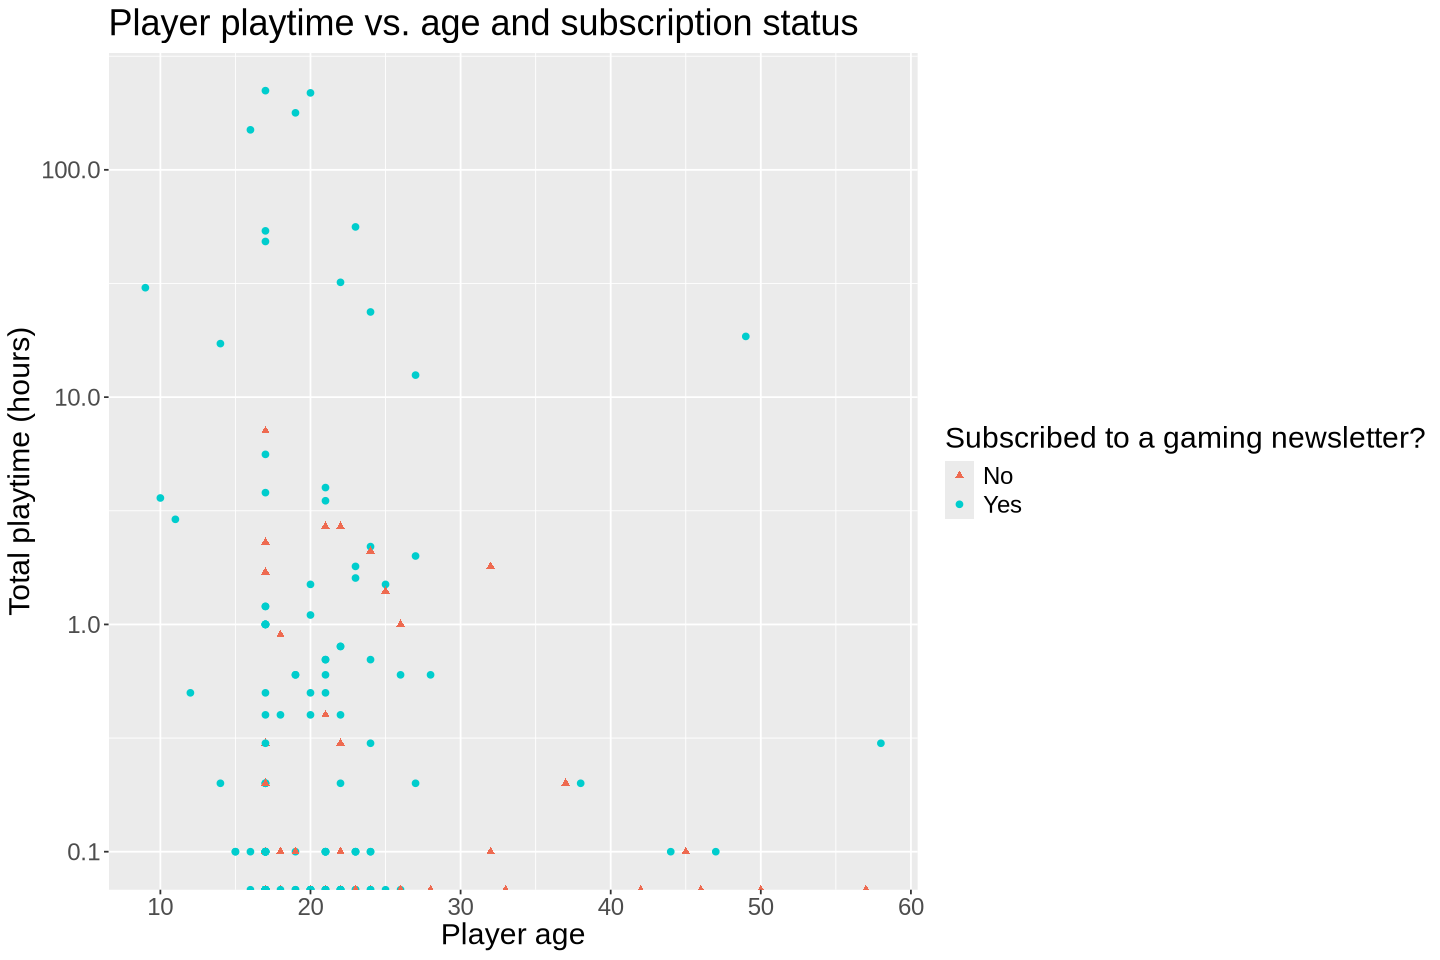

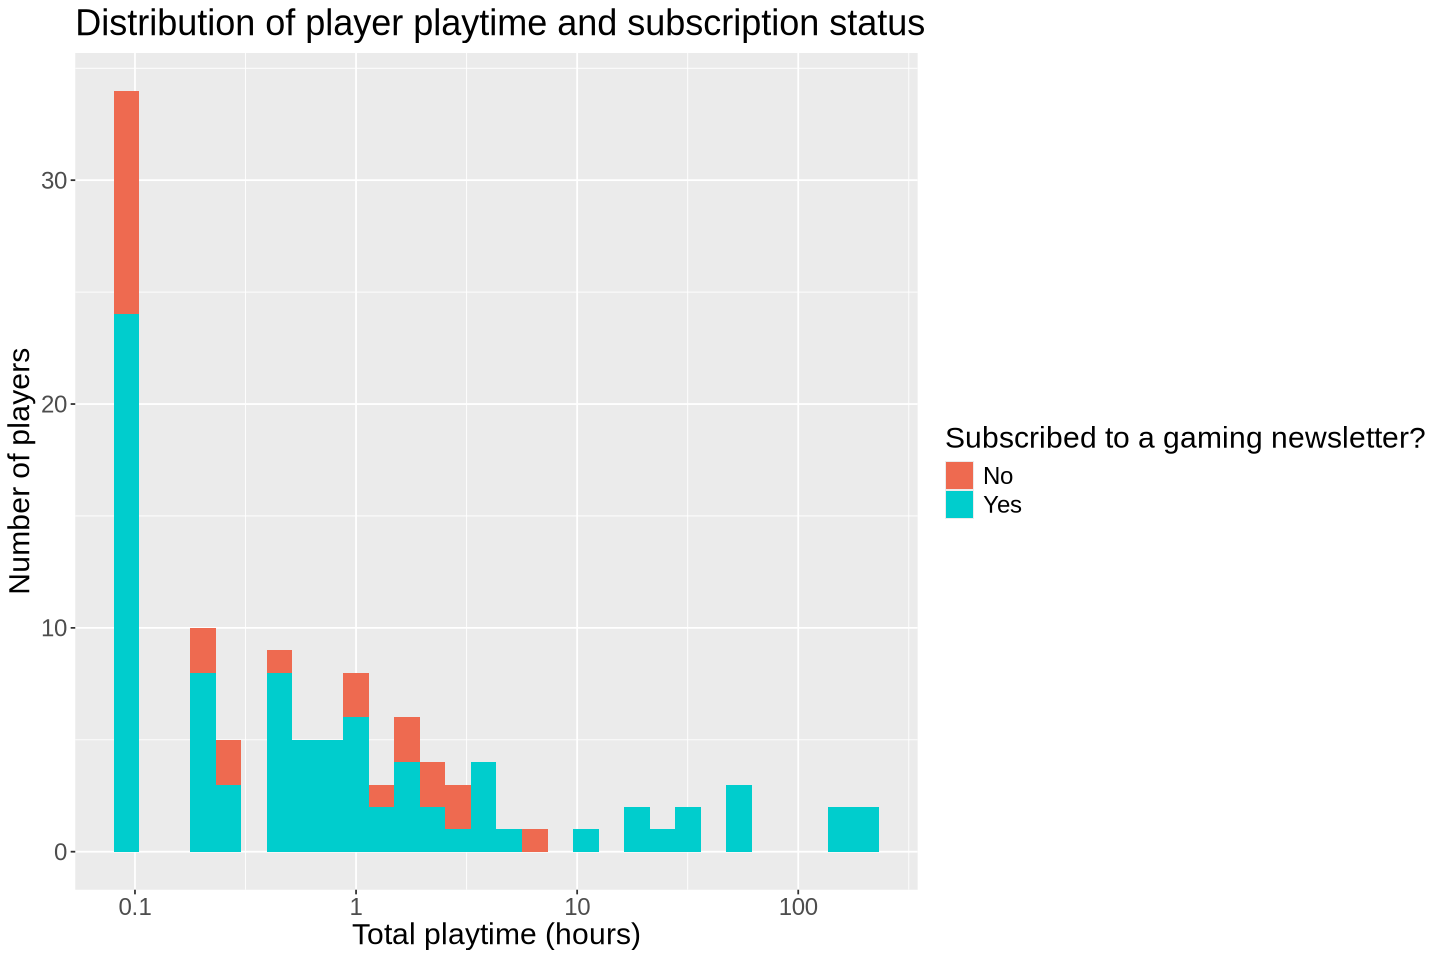

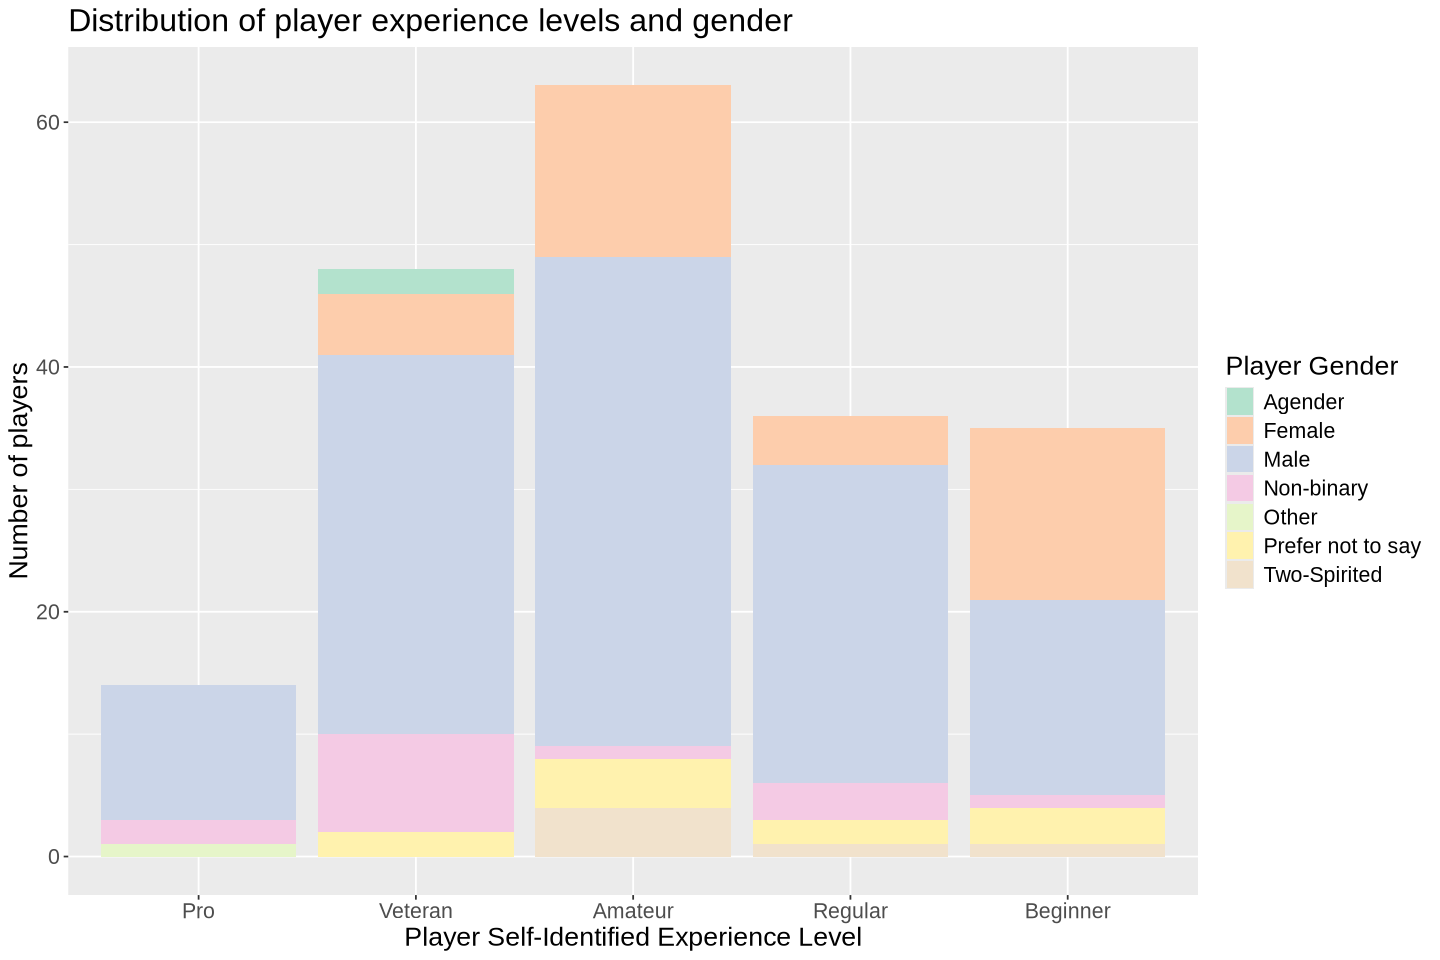

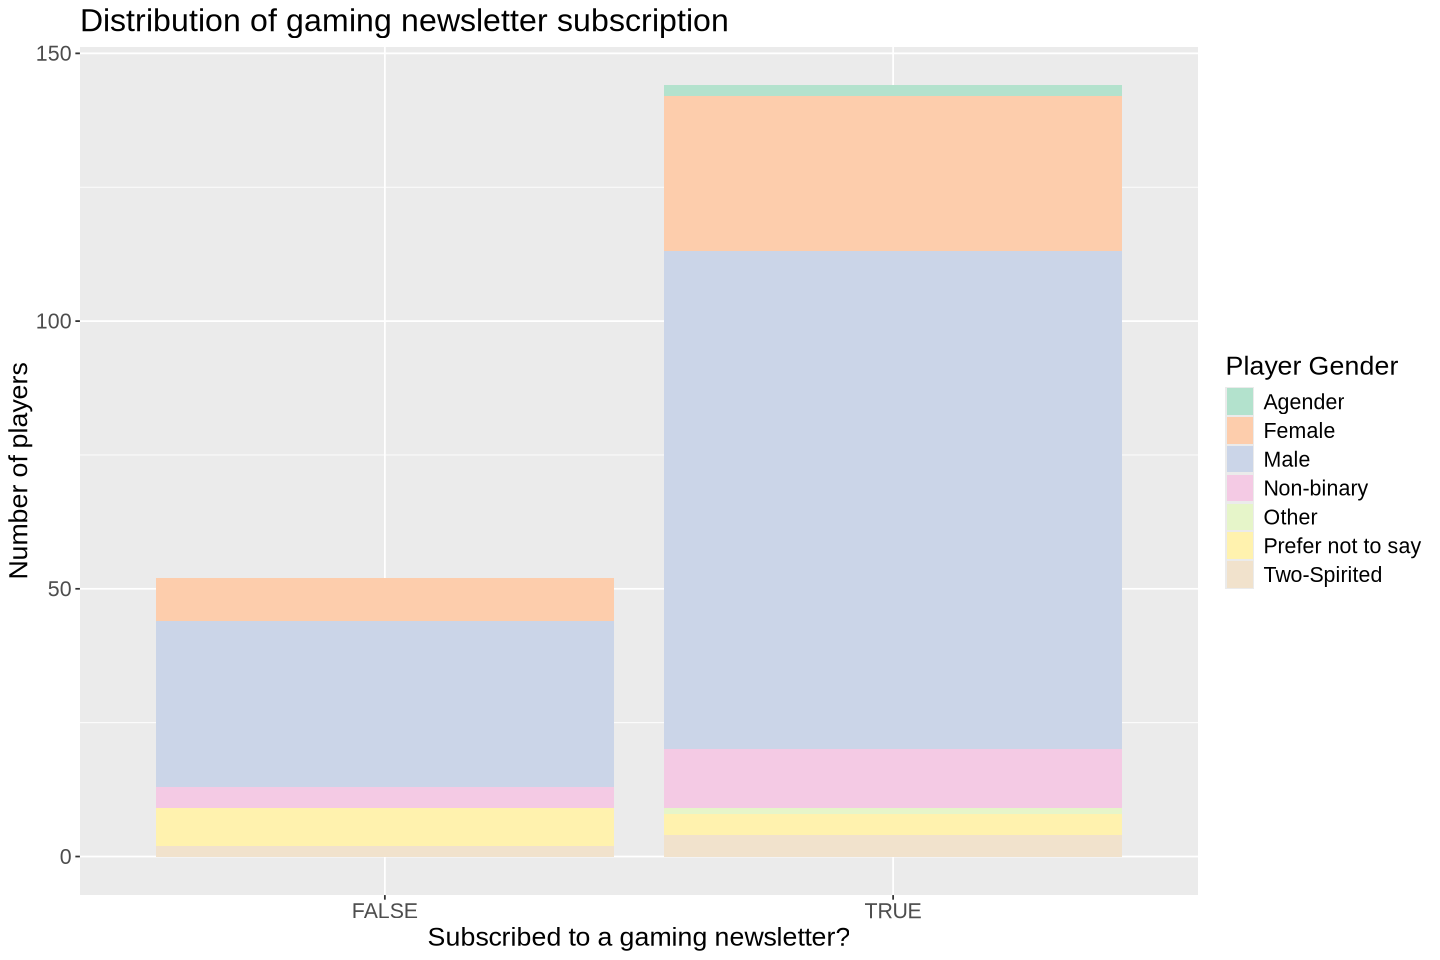

In [9]:
library(RColorBrewer)
options(repr.plot.width = 12, repr.plot.height = 8)

ggplot(players, aes(x=age, y=played_hours, colour = subscribe, shape = subscribe)) +
    geom_point() +
    labs(x="Player age", y="Total playtime (hours)", colour = "Subscribed to a gaming newsletter?", shape = "Subscribed to a gaming newsletter?", title="Player playtime vs. age and subscription status")+
    scale_color_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    scale_shape_manual(labels=c("No","Yes"), values=c("triangle", "circle"))+
    scale_y_log10()+
    theme(text = element_text(size=18))

ggplot(players, aes(x=played_hours, fill = subscribe)) +
    geom_histogram() +
    labs(x="Total playtime (hours)", y="Number of players", fill = "Subscribed to a gaming newsletter?", title="Distribution of player playtime and subscription status")+
    scale_fill_manual(labels=c("No","Yes"), values=c("coral2", "cyan3"))+
    theme(text = element_text(size=18))+
    scale_x_log10(breaks=c(0.1,1,10,100), labels=c("0.1","1","10","100"))

ggplot(players, aes(x=as_factor(experience), fill = gender)) +
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Player Self-Identified Experience Level", y="Number of players", title="Distribution of player experience levels and gender", fill = "Player Gender")+
    scale_fill_brewer(palette = 'Pastel2')

ggplot(players, aes(x=subscribe, fill=gender)) + 
    geom_bar(stat="count") +
    theme(text = element_text(size=16)) +
    labs(x="Subscribed to a gaming newsletter?", y="Number of players", title="Distribution of gaming newsletter subscription", fill = "Player Gender")+
    scale_fill_brewer(palette = 'Pastel2')

### Visualization Interpretation

The first plot suggests that subscribing to a gaming newsletter results in cases with more hours of playtime, since all the extreme cases are subscribed. It also indicates that there is not any strong relationship between age and playtime. 

The second plot shows the distribution of playtime, on a logarithmic scale. This shows that most very active players (cases with 10+ hours of playtime) are all subscribed to a game-related newsletter. It also shows that a majority of players that play between 30 minutes to 10 hours are also subscribed.

The third plot shows the relative frequencies of gender for each experience level. This shows that males are the majority gender demographic.

The last plot shows the relative frequencies of gender for subscription status. This shows that gender and subscription are seemingly independent, as there is no major difference between the 2 distributions.

## Proposed Method and Plan

My proposed method will predict playtimes by K-NN regression.

This method is appropriate as players with similar traits have similar playtimes, and also because there is no linear form in this data (both in log-transformed and original form), which rules out linear regression.

I will be assuming that players with similar traits will have similar playtimes, and that playtime can be predicted through age, experience, gender, and subscription status.

Potential limitations are outliers.

I will compare and select the model by tuning k for the K-NN regression, and will perform 5-fold cross validation within the training set, and will finally evaluate performance by analyzing RMSPE. I will split the data into 70% training and 30% testing, and will process it by turning all categorical variables into factors and standardizing quantitative variables, for use in the K-NN regression.